In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
import numpy as np
from numba import jit
import matplotlib.mlab as ml

In [2]:
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
cpt = loadCPT('dv_anom.cpt')
cpt_convert = LinearSegmentedColormap('cpt', cpt)

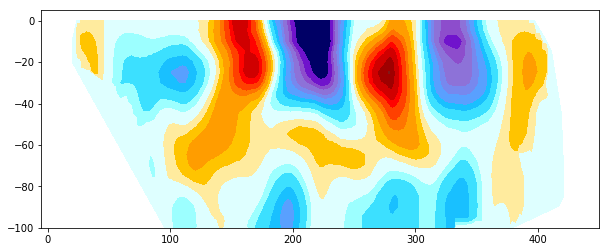

In [14]:
i = str(1)
model = "BOARD_N2"
df = pd.read_csv("../" + model + "/vert/ver_15 " + i + ".xyz",
                 delim_whitespace=True,
                 names = ["x","y","v"])
# df_eq = pd.read_csv("../MODEL_10/vert/ztr_ " + i + ".dat",
#                    delim_whitespace = True,
#                    names = ["x","y","p"])
# df_st = pd.read_csv("../MODEL_10/vert/stat_ " + i + ".dat",
#                    delim_whitespace = True,
#                    names = ["x","y"])

df = df[(df['v'] > -20) & (df['v'] < 20)]
df.v[df.v <= -10] = -9.9
df.v[df.v >= 10] = 9.9
x=np.array(df['x']) 
y=np.array(df['y']) 
data=np.array(df["v"])
plt.figure(figsize=(10,4))
plt.tricontourf(x,y+6,data,
                cmap = cpt_convert,
                levels=np.linspace(-10,10,50)
               )
# plt.scatter(df_eq.x,df_eq.y,c="k",s=5)
# plt.scatter(df_st.x,df_st.y,c="k",s=30,marker="s")
plt.ylim(-100,5)
plt.xlim(-5,450)
plt.show()